In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure character display
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Define column names
cols = ['label'] + [f'I{i}' for i in range(1, 14)] + [f'C{i}' for i in range(1, 27)]

num_features = [f'I{i}' for i in range(1, 14)]  # Numerical features

# Load data (first 10,000 rows)
data = pd.read_csv('../../data/raw/train.txt', sep='\t', header=None, names=cols, nrows=10000)

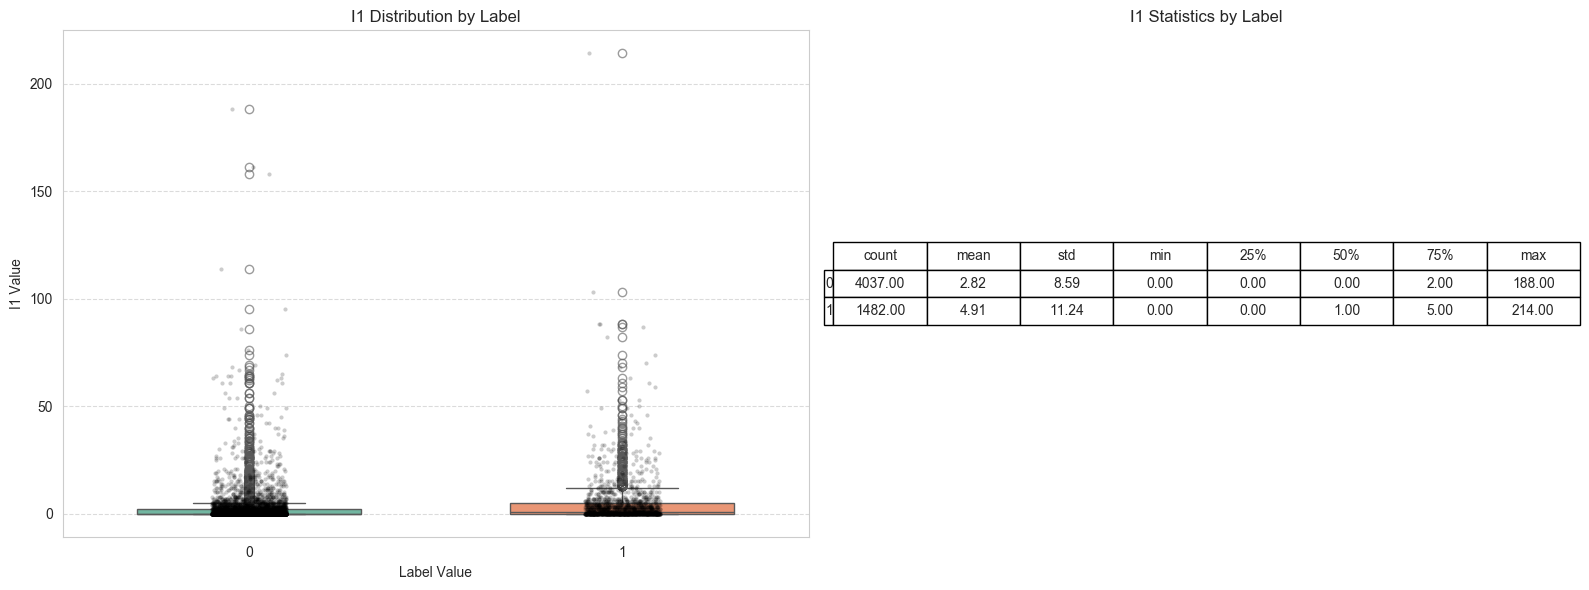

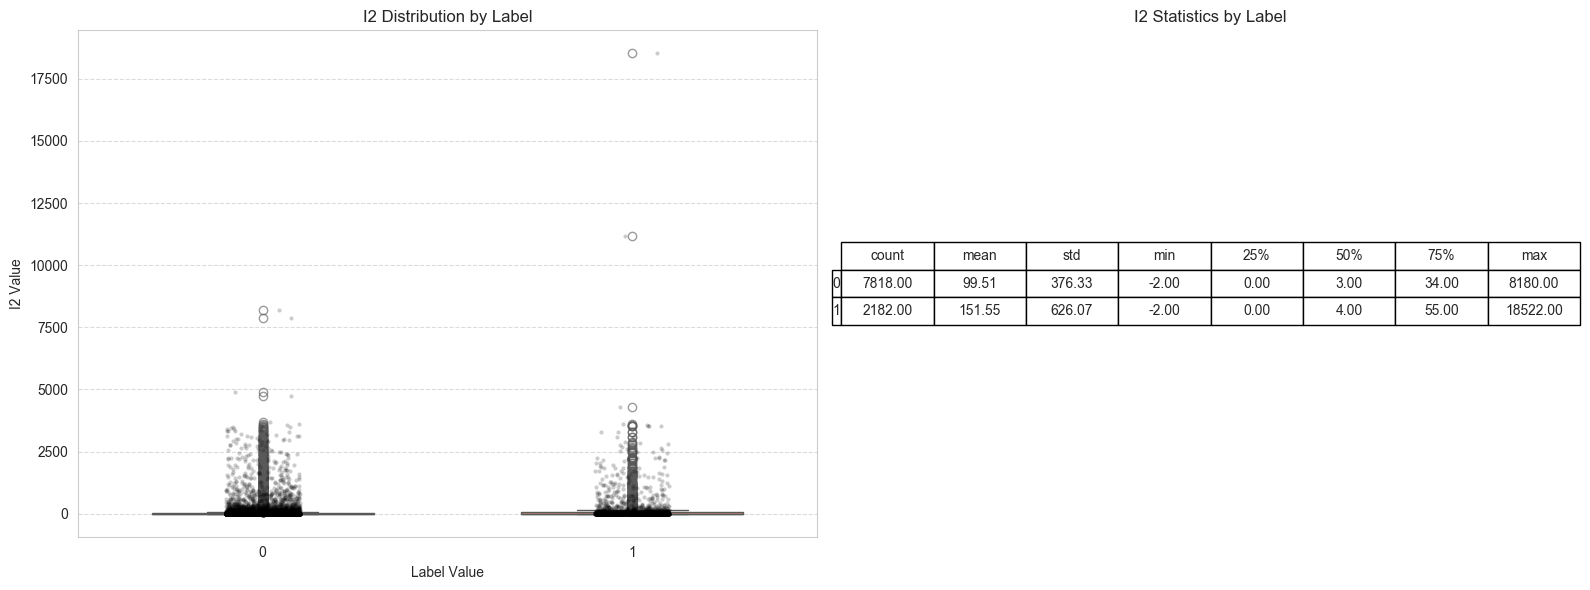

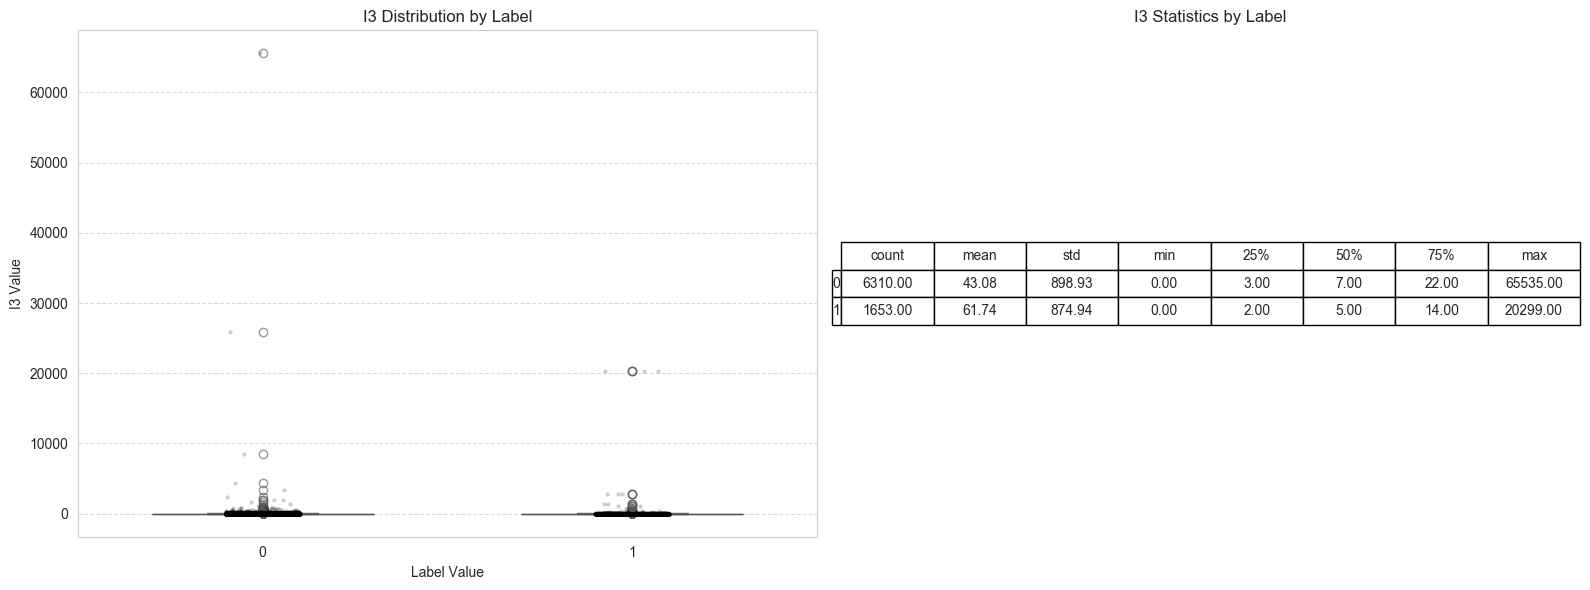

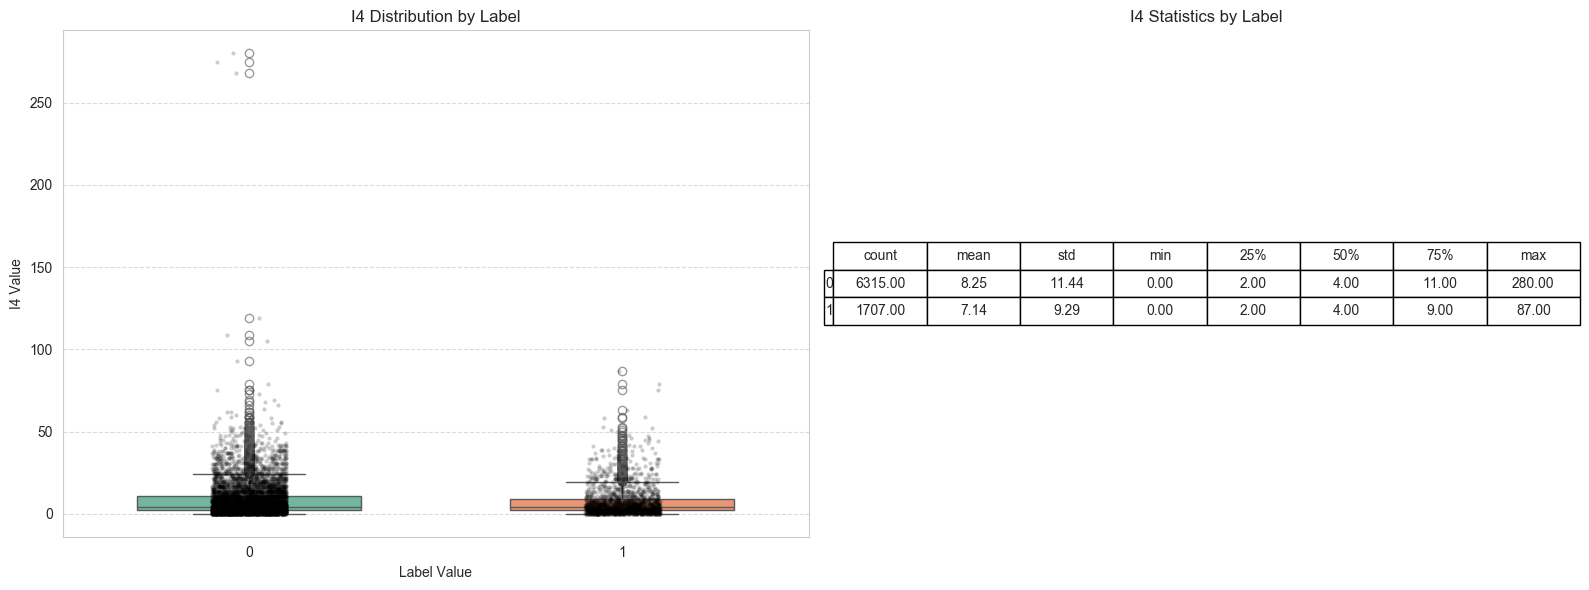

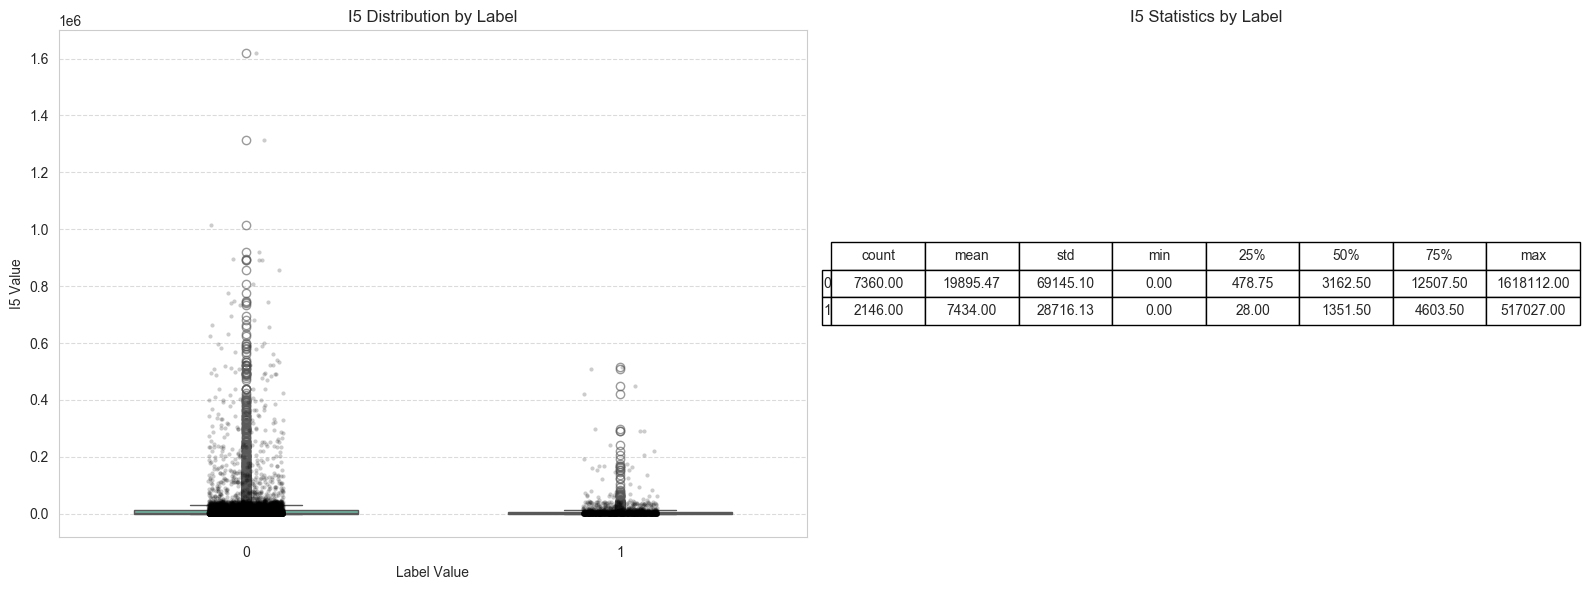

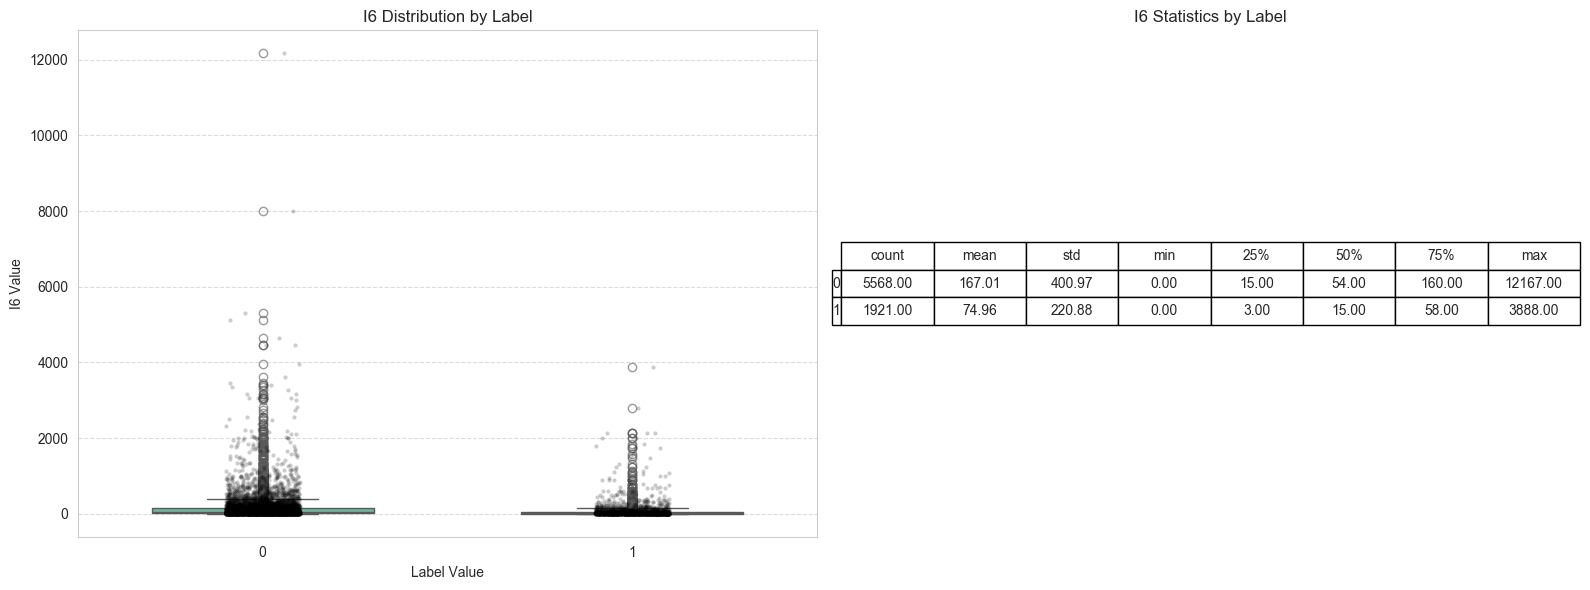

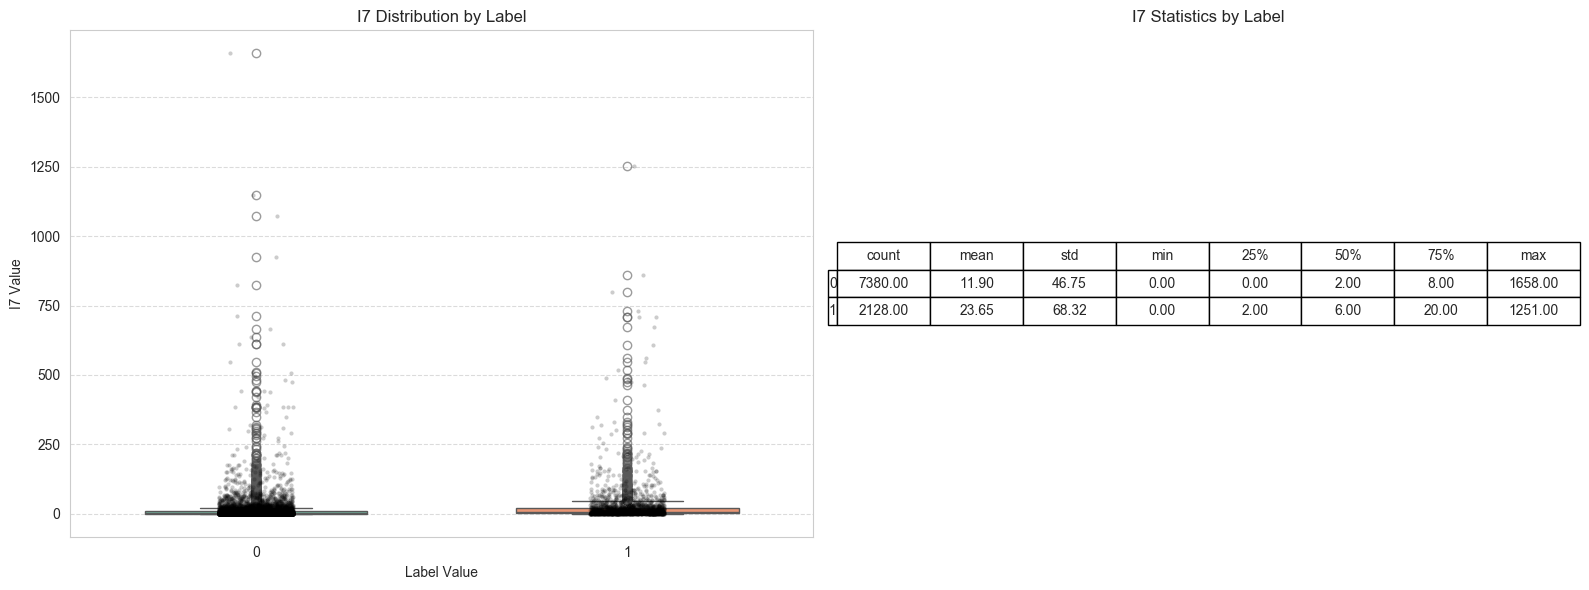

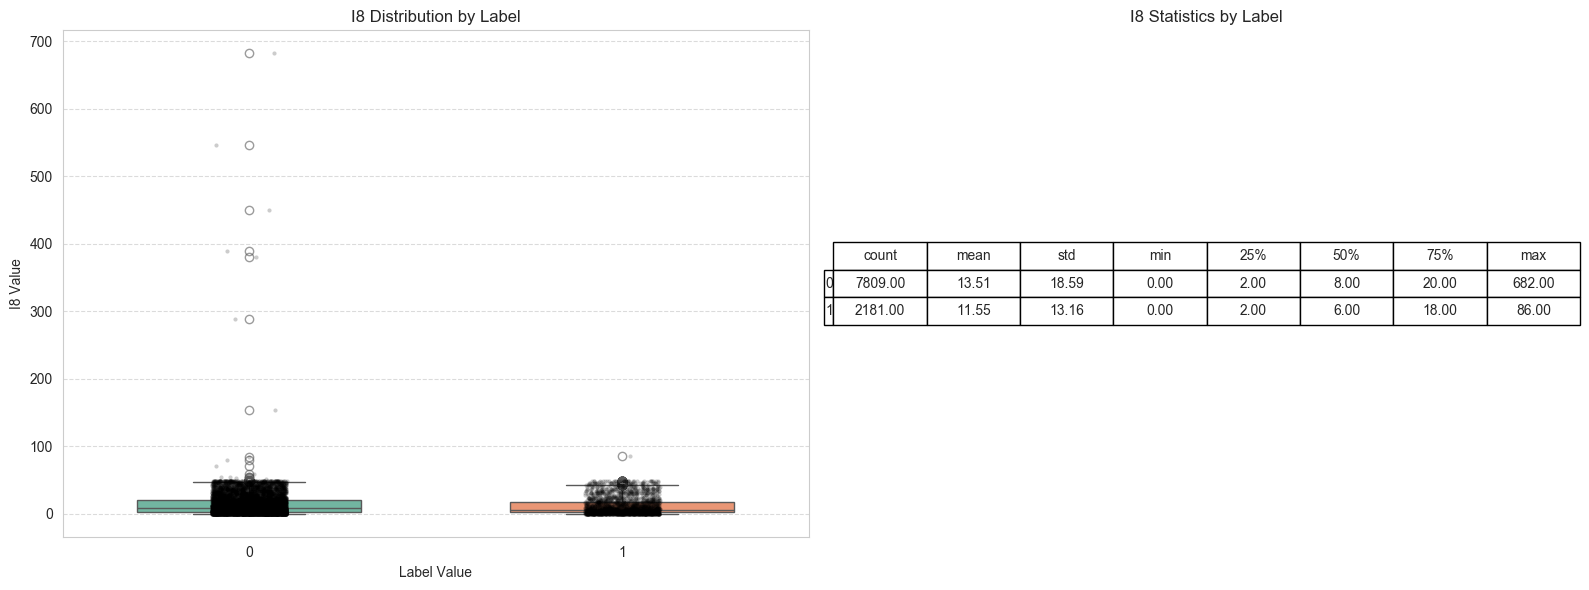

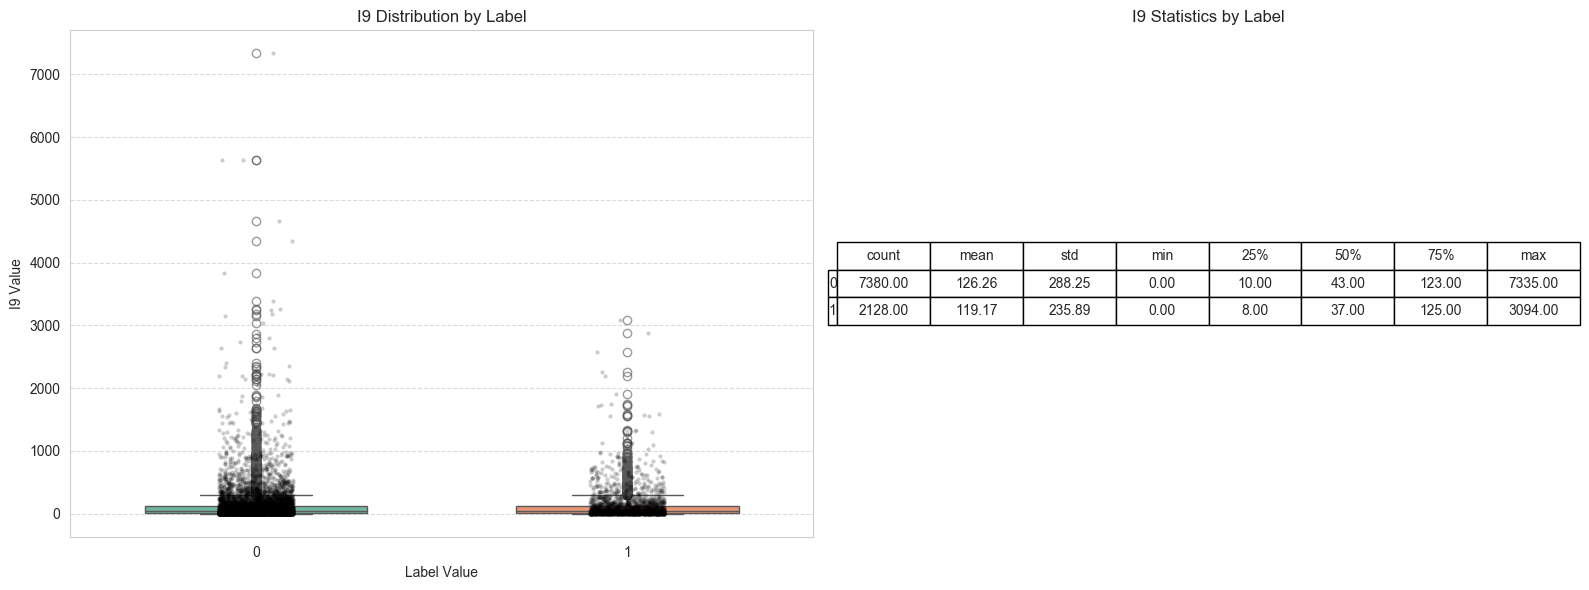

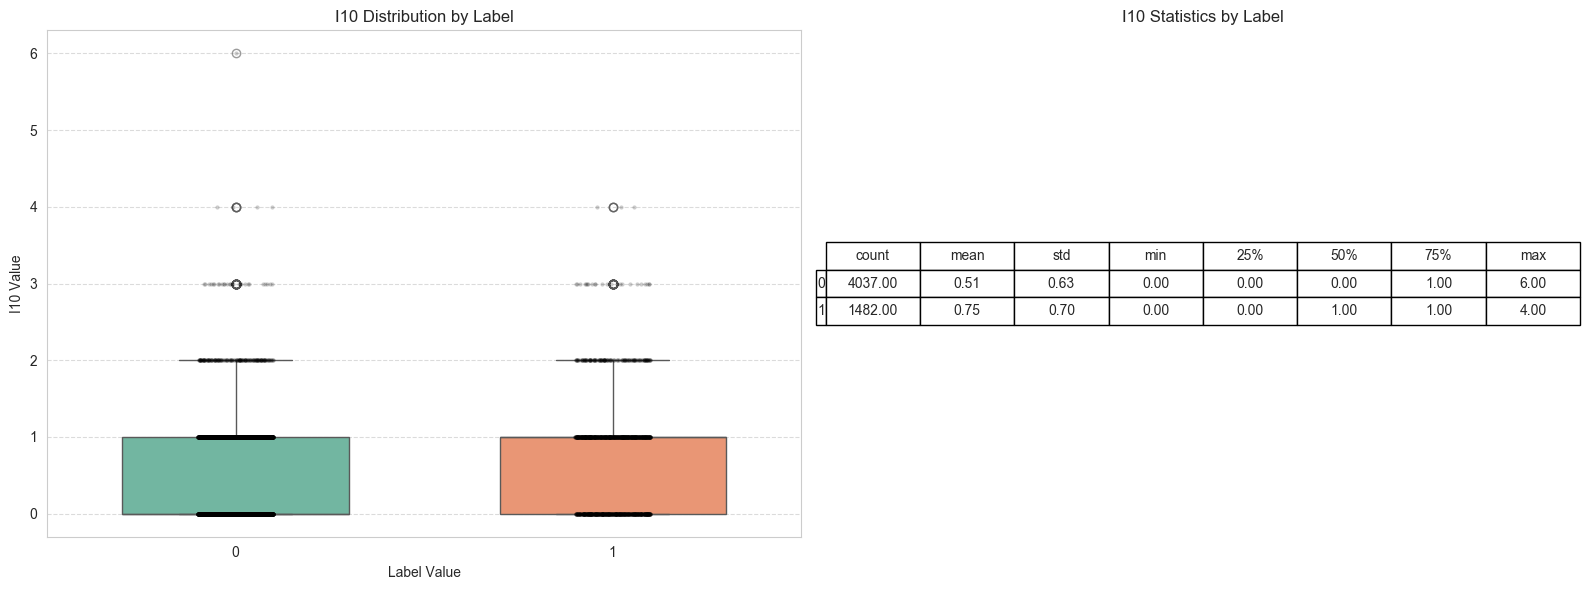

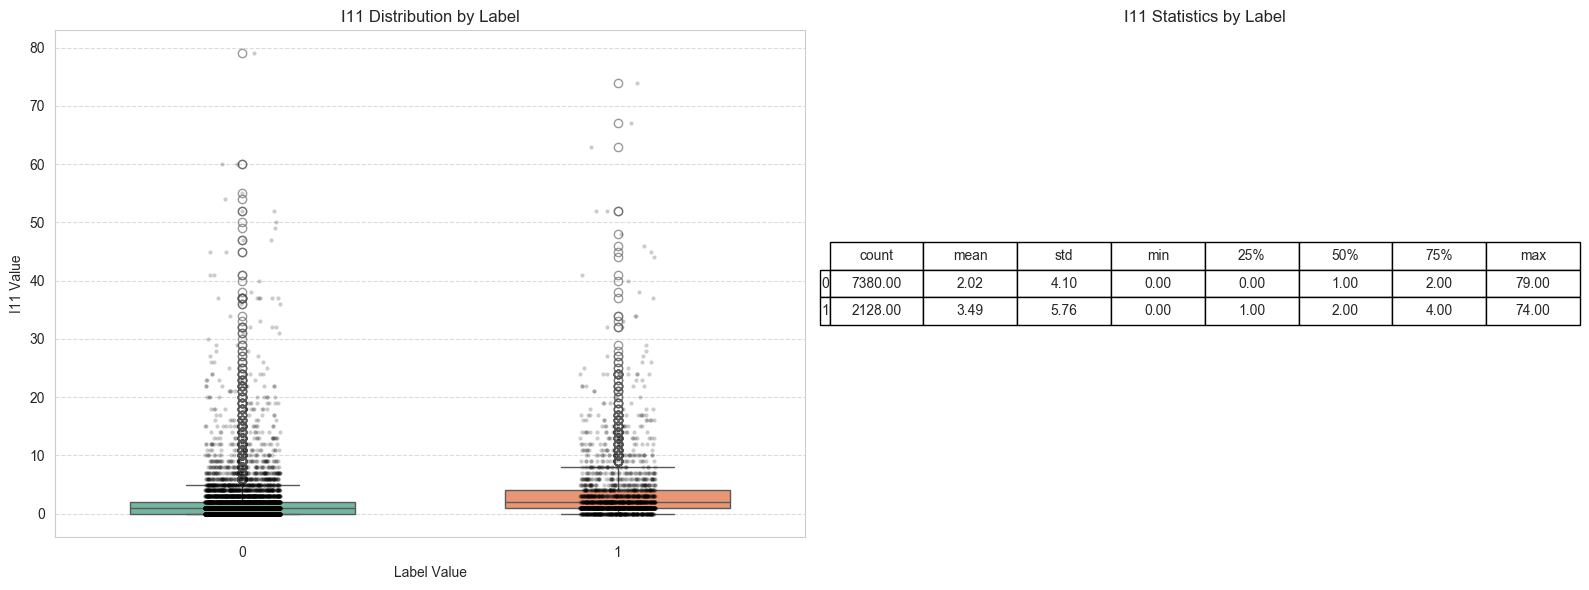

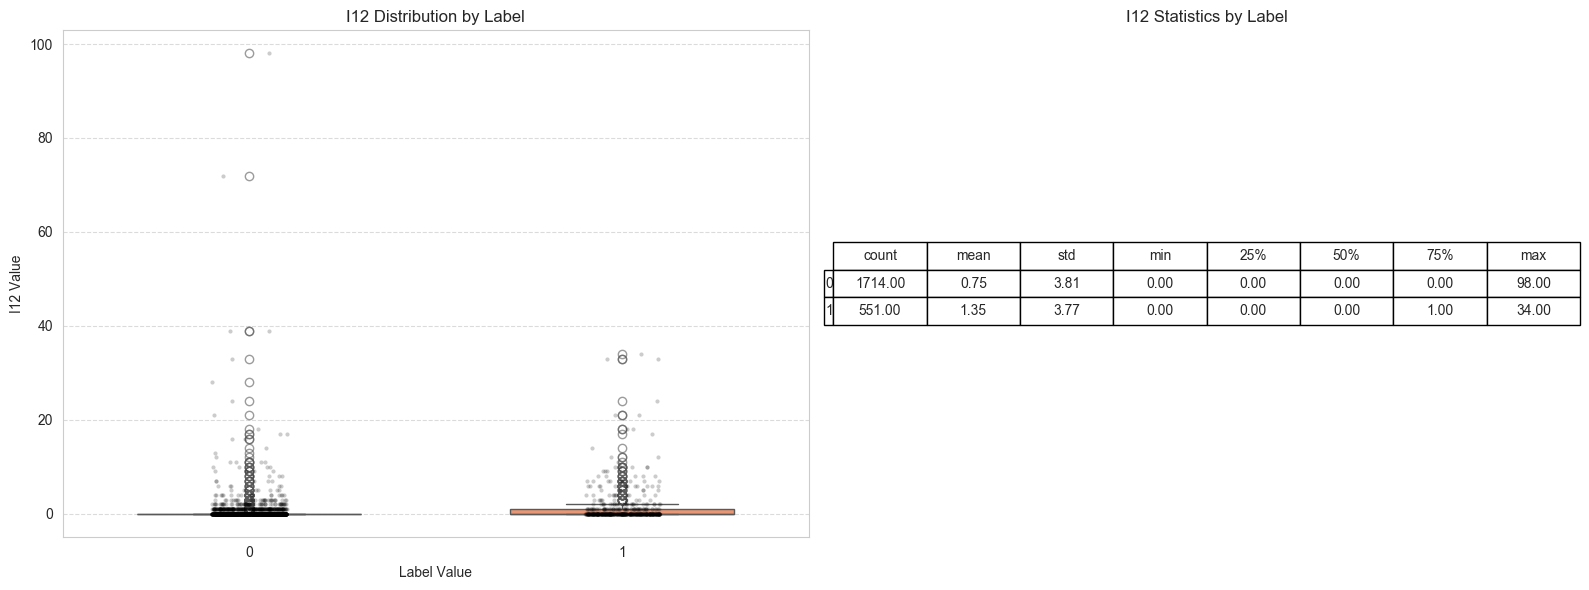

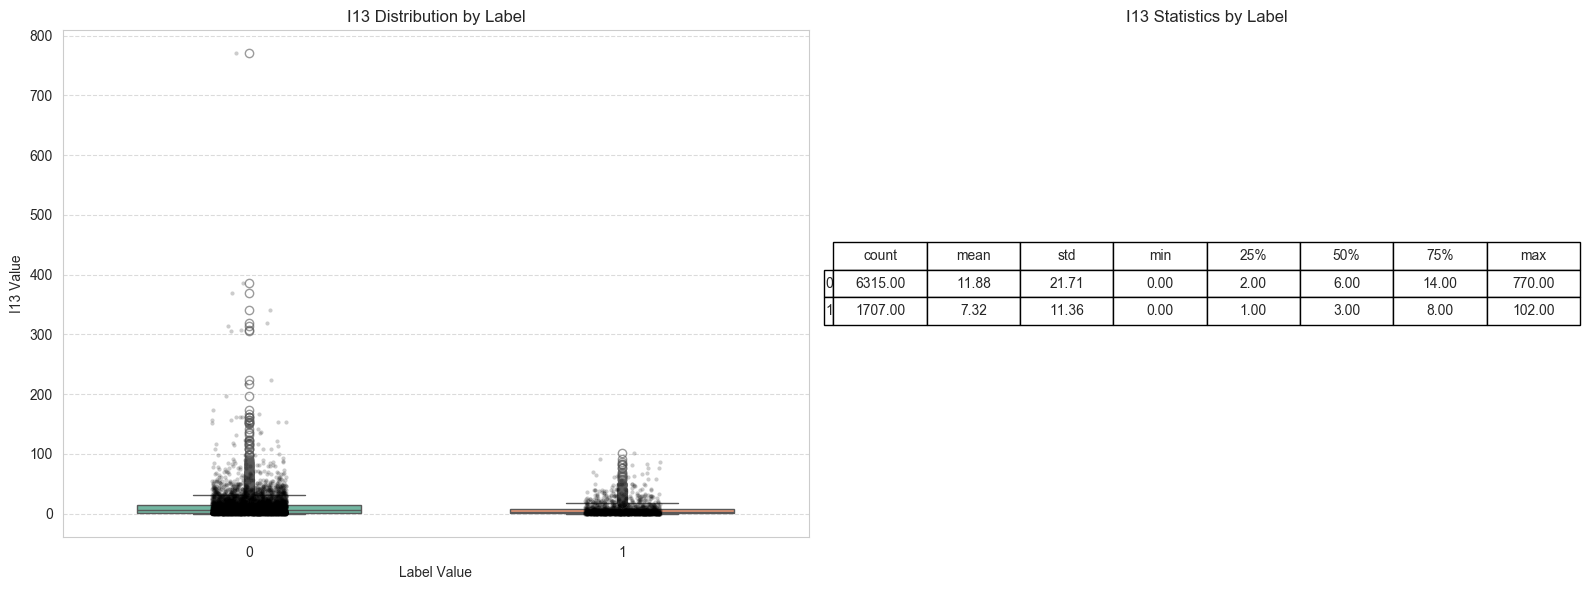

In [5]:
# ====================================================
# Define function to plot boxplot and statistics table
# ====================================================
def plot_feature_with_stats(data, feature):
    """Plot boxplot and statistical table for a single feature grouped by label"""
    # Create figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Left subplot: Boxplot
    sns.boxplot(
        data=data,
        x='label',
        y=feature,
        hue='label',
        ax=ax1,
        palette='Set2',
        width=0.6,
        flierprops=dict(marker='o', color='#fb8500', alpha=0.6),
        legend=False
    )
    # Add individual data points
    sns.stripplot(
        data=data,
        x='label',
        y=feature,
        ax=ax1,
        color='black',
        alpha=0.2,
        size=3,
        jitter=True
    )
    ax1.set_title(f'{feature} Distribution by Label', fontsize=12)
    ax1.set_xlabel('Label Value', fontsize=10)
    ax1.set_ylabel(f'{feature} Value', fontsize=10)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Right subplot: Statistics table
    stats = data.groupby('label')[feature].describe().round(2)
    cell_text = []
    for row in stats.values:
        cell_text.append([f'{x:.2f}' for x in row])

    table = ax2.table(
        cellText=cell_text,
        rowLabels=stats.index,
        colLabels=stats.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    ax2.axis('off')  # Hide axes for table subplot
    ax2.set_title(f'{feature} Statistics by Label', fontsize=12)

    plt.tight_layout()
    return fig


for feature in num_features:
    fig = plot_feature_with_stats(data, feature)
    plt.show()